<a href="https://colab.research.google.com/github/voroninip/Tanya_AD/blob/main/Pandas_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#Pandas для анализа данных


В связке с библиотеками Matplotlib и Seaborn даёт возможность для классной визуализации данных.

Типичные форматы хранения табличных данных:
* .csv
* .tsv
* .xlsx

Основные структуры библиотеки:
* **класс Series** (одномерный индексированный массив данных некоторого фиксированного типа)
* **класс DataFrame** (двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа)


пример DataFrame:


In [ ]:
data = pd.read_csv(r'/content/insurance.csv')
type(data)

pandas.core.frame.DataFrame

In [ ]:
df = pd.DataFrame(data)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


пример Series:

In [ ]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [ ]:
type(df['age'])

pandas.core.series.Series

###Создание объекта Series

In [ ]:
pd.Series(data=None, index=None, dtype=None, name=None, copy=False)

* data - структура, на базе которой будет создан объект Series;
* index - список меток, который будет использоваться для доступа к элементам объекта Series.
* dtype - тип данных;
* name - имя объекта Series;
* copy - если параметр принимает значение True, то будет создана копия массива данных и на ее базе сформирован объект Series. По умолчанию False.

Создать объект Series можно разными способами:

* из списка Python;
* из словаря;
* используя NumPy-массив;
* используя константу.

**Пример 1:**

In [ ]:
lst = [20, 30, 40]
print(lst)

srs = pd.Series(data=lst)
print(srs)

[20, 30, 40]
0    20
1    30
2    40
dtype: int64


полезный метод:

In [ ]:
srs.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3 entries, 0 to 2
Series name: None
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 152.0 bytes


**Пример 2:**

In [ ]:
srs = pd.Series(lst, index=['A', 'B', 'C'])
print(srs)
srs.info()

A    20
B    30
C    40
dtype: int64
<class 'pandas.core.series.Series'>
Index: 3 entries, A to C
Series name: None
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


In [ ]:
srs.index.name = 'Индекс'
print(srs)

Индекс
A    20
B    30
C    40
dtype: int64


In [ ]:
display(srs.values)

array([20, 30, 40])

In [ ]:
display(srs.index.values)

array(['A', 'B', 'C'], dtype=object)

###Создание DataFrame

In [ ]:
data = {'product_name': ['laptop', 'printer', 'tablet', 'desk', 'chair'],
        'price': [1200, 150, 300, 450, 200],
        'rate': [5, 3, 4, 2, 3]
        }
df = pd.DataFrame(data)
df

,product_name,price,rate
0,laptop,1200,5
1,printer,150,3
2,tablet,300,4
3,desk,450,2
4,chair,200,3


from matplotlib import pyplot as plt
df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['rate'].plot(kind='hist', bins=20, title='rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('product_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['rate'].plot(kind='line', figsize=(8, 4), title='rate')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['product_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='price', y='product_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['product_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='rate', y='product_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.index = ['a', 'b', 'c', 'd', 'e']
df

,product_name,price,rate
a,laptop,1200,5
b,printer,150,3
c,tablet,300,4
d,desk,450,2
e,chair,200,3


#### Методы




**.mean()**

**.median()**

**.nunique()**

**.describe()** -- показывает основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [ ]:
df.describe()

,price,rate
count,5.000000,5.000000
mean,460.000000,3.400000
std,429.243521,1.140175
min,150.000000,2.000000
25%,200.000000,3.000000
50%,300.000000,3.000000
75%,450.000000,4.000000
max,1200.000000,5.000000


**.loc()** -- обращение к строке/набору строк по названию

**.iloc()** -- обращение к строке/набору строк по индексу

In [ ]:
print(df.loc['b'])

product_name    printer
price               150
rate                  3
Name: b, dtype: object


In [ ]:
print(df.iloc[1])

product_name    printer
price               150
rate                  3
Name: b, dtype: object


####Условия



In [ ]:
df[df['price']>=300]

,product_name,price,rate
a,laptop,1200,0
c,tablet,300,4
d,desk,450,2


In [ ]:
df[(df['price']>=300) & (df['rate']>=3)]

,product_name,price,rate
c,tablet,300,4


In [ ]:
df[(df['price']>=300) & (df['rate']>=3)]['product_name']

c    tablet
Name: product_name, dtype: object

**.groupby()**

## Задачи

1. Создать свой DataFrame, содержащий столбцы с категориальными, числовыми, строковыми, булевыми признаками. Вывести описание датафреймя, средние значения и вообще все числовые характеристики, какие вы сможете получить.
2. Взять на [Kaggle](https://www.kaggle.com/) любой датасет, скачать его, вывести и проанализировать известными вам методами (посчитать средние, посмотреть .describe() etc)
3. [контест](http://judge2.vdi.mipt.ru/cgi-bin/new-register?contest_id=850602)

## Ссылки
1. [Страничка на степике](https://stepik.org/lesson/1018078/step/2)
2. [Ноутбук Физтех.Статистики](https://mipt-stats.gitlab.io/courses/python/08_pandas1.html)
3. [Хабр](https://habr.com/ru/articles/521894/)
4. Лаба [изначальная](https://cs.mipt.ru/advanced_python/lessons/lab17.html) с сайта

### 1. Создать свой DataFrame, содержащий столбцы с категориальными, числовыми, строковыми, булевыми признаками. Вывести описание датафрейма, средние значения и вообще все числовые характеристики, какие вы сможете получить.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

In [54]:
df = pd.DataFrame({
    'name': ['Yulon', 'Jack', 'John', 'Mary', 'Bob', 'Luis', 'Ann', 'Michael', 'Raus', 'Arnold', 'Guene'], 
    'age': [20, 21, 20, 19, 22, 20, 20, 21, 20, 19, 20],
    'mark': [4, 3, 5, 3, 4, 4, 4, 3, 5, 4, 5], 
    'graded_season': ['Winter', 'Spring', 'Summer', 'Winter', 'Summer', 'Autumn', 'Spring', 'Winter', 'Summer', 'Autumn', 'Spring'], 
     'bachelor': [True, False, True, True, False, True, True, False, True, True, False]})
df

,name,age,mark,graded_season,bachelor
0,Yulon,20,4,Winter,True
1,Jack,21,3,Spring,False
2,John,20,5,Summer,True
3,Mary,19,3,Winter,True
4,Bob,22,4,Summer,False
5,Luis,20,4,Autumn,True
6,Ann,20,4,Spring,True
7,Michael,21,3,Winter,False
8,Raus,20,5,Summer,True
9,Arnold,19,4,Autumn,True


In [55]:
df.describe()

,age,mark
count,11.000000,11.000000
mean,20.181818,4.000000
std,0.873863,0.774597
min,19.000000,3.000000
25%,20.000000,3.500000
50%,20.000000,4.000000
75%,20.500000,4.500000
max,22.000000,5.000000


In [56]:
df.groupby('graded_season').mark.mean()

graded_season
Autumn    4.000000
Spring    4.000000
Summer    4.666667
Winter    3.333333
Name: mark, dtype: float64

In [57]:
df.groupby('graded_season').age.mean()

graded_season
Autumn    19.500000
Spring    20.333333
Summer    20.666667
Winter    20.000000
Name: age, dtype: float64

In [58]:
df.groupby('age').bachelor.sum()

age
19    2
20    5
21    0
22    0
Name: bachelor, dtype: int64

### 2. Взять на [Kaggle](https://www.kaggle.com/) любой датасет, скачать его, вывести и проанализировать известными вам методами (посчитать средние, посмотреть .describe() etc)

In [59]:
df = pd.read_csv('train.csv', index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [60]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак


def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

df, df_target = get_features_and_target(df)

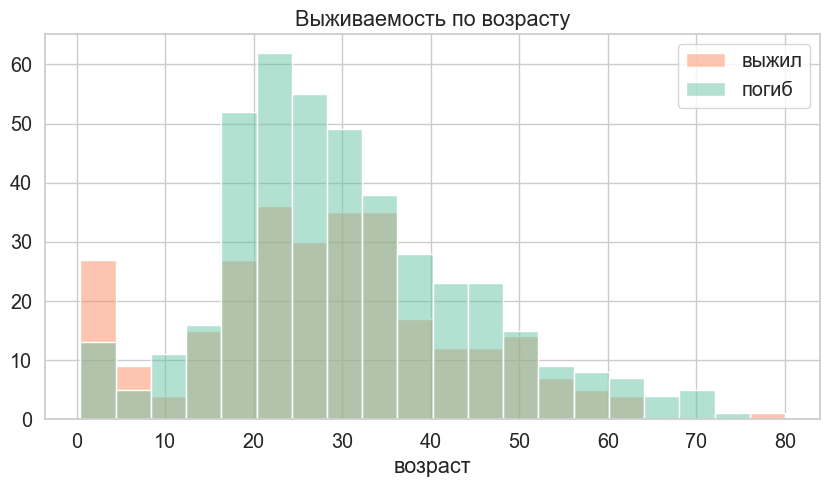

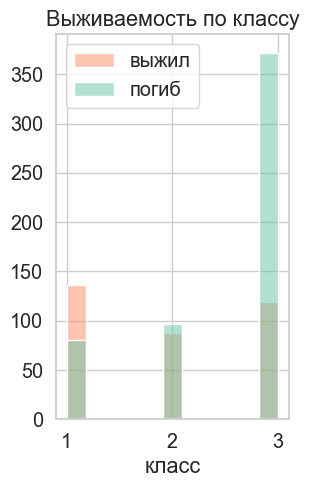

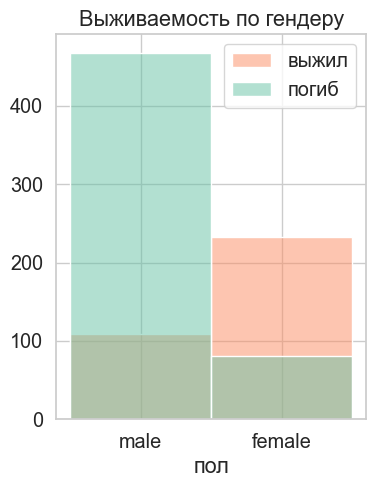

     доля погибших  доля выживших
пол                              
жен       0.257962       0.742038
муж       0.811092       0.188908


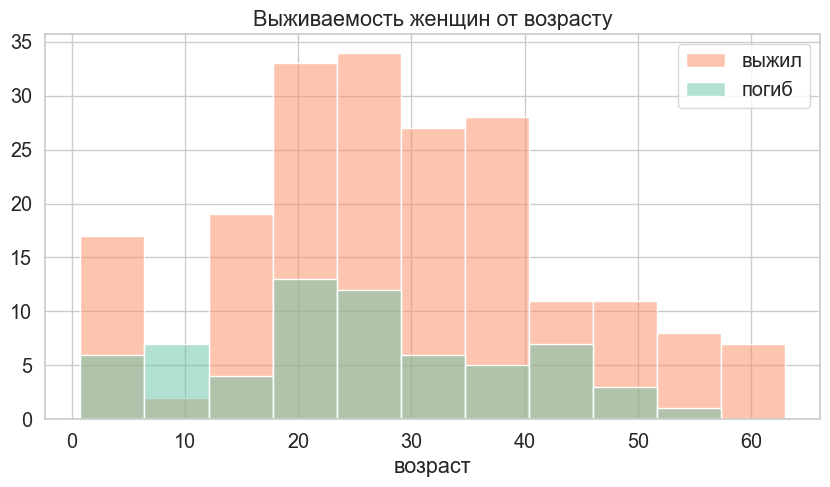

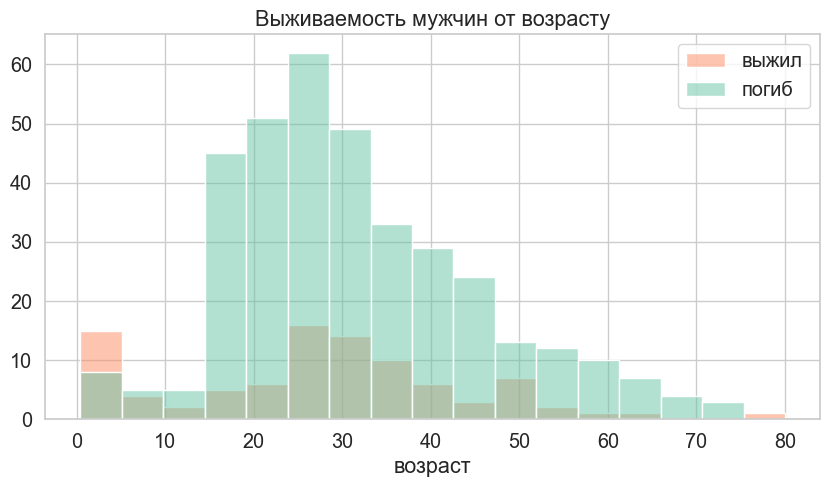

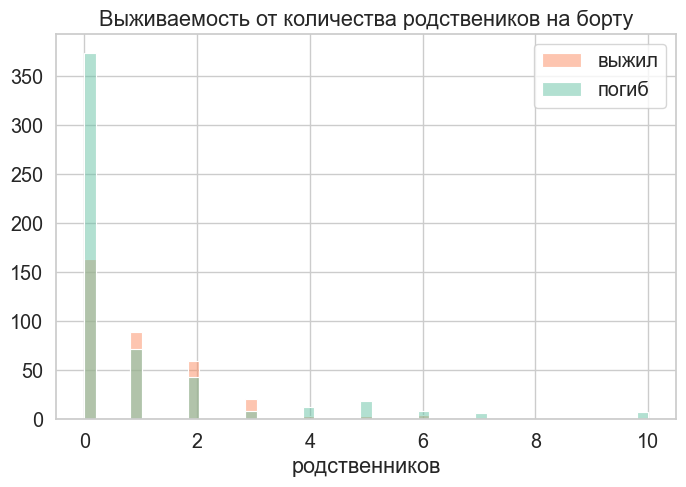

                   доля погибших  доля выживших
родных у человека                              
0                       0.696462       0.303538
1                       0.447205       0.552795
2                       0.421569       0.578431
3                       0.275862       0.724138
4                       0.800000       0.200000
5                       0.863636       0.136364
6                       0.666667       0.333333
7                       1.000000       0.000000
10                      1.000000       0.000000


In [63]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x='Age', hue=df_target)
plt.title('Выживаемость по возрасту')
plt.xlabel('возраст')
plt.ylabel('')
plt.legend(['выжил', 'погиб'])
plt.show()

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(3, 5))
    sns.histplot(data=df, x='Pclass', hue=df_target)
plt.title('Выживаемость по классу')
plt.xlabel('класс')
plt.ylabel('')
plt.legend(['выжил', 'погиб'])
plt.show()

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(4, 5))
    sns.histplot(data=df, x='Sex', hue=df_target)
plt.title('Выживаемость по гендеру')
plt.xlabel('пол')
plt.ylabel('')
plt.legend(['выжил', 'погиб'])
plt.show()

print((pd.crosstab(index=df['Sex'], columns=df_target,
       rownames=['пол'], colnames=[''], margins=False,
       normalize='index')).rename(index={'female': 'жен', 'male': 'муж'},
                                  columns={0: 'доля погибших', 1: 'доля выживших'}))

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    sns.histplot(
        data=df[df['Sex'] == 'female'], x='Age', hue=df_target)
plt.title('Выживаемость женщин от возрасту')
plt.xlabel('возраст')
plt.ylabel('')
plt.legend(['выжил', 'погиб'])
plt.show()

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    sns.histplot(
        data=df[df['Sex'] == 'male'], x='Age', hue=df_target)
plt.title('Выживаемость мужчин от возрасту')
plt.xlabel('возраст')
plt.ylabel('')
plt.legend(['выжил', 'погиб'])
plt.show()

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=df, x=df['SibSp'] + df['Parch'], hue=df_target)
plt.title('Выживаемость от количества родствеников на борту')
plt.xlabel('родственников')
plt.ylabel('')
plt.legend(['выжил', 'погиб'])
plt.show()

print((pd.crosstab(index=df['SibSp'] + df['Parch'],
                   columns=df_target, rownames=['родных у человека'],
                   colnames=[''], margins=False, margins_name='всего',
                   normalize='index')).rename(columns={0: 'доля погибших',
                                                       1: 'доля выживших'}))